In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1269.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1385.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1383.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1354.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1339.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1380.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1304.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1340.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1211.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1355.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1222.jpg
/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Broccoli/1

In [6]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# On Kaggle Notebook, after adding the data, you can import the data directory as follows
train_dir=("../input/vegetable-image-dataset/Vegetable Images/train")
valid_dir=("../input/vegetable-image-dataset/Vegetable Images/validation")
test_dir=("../input/vegetable-image-dataset/Vegetable Images/test")

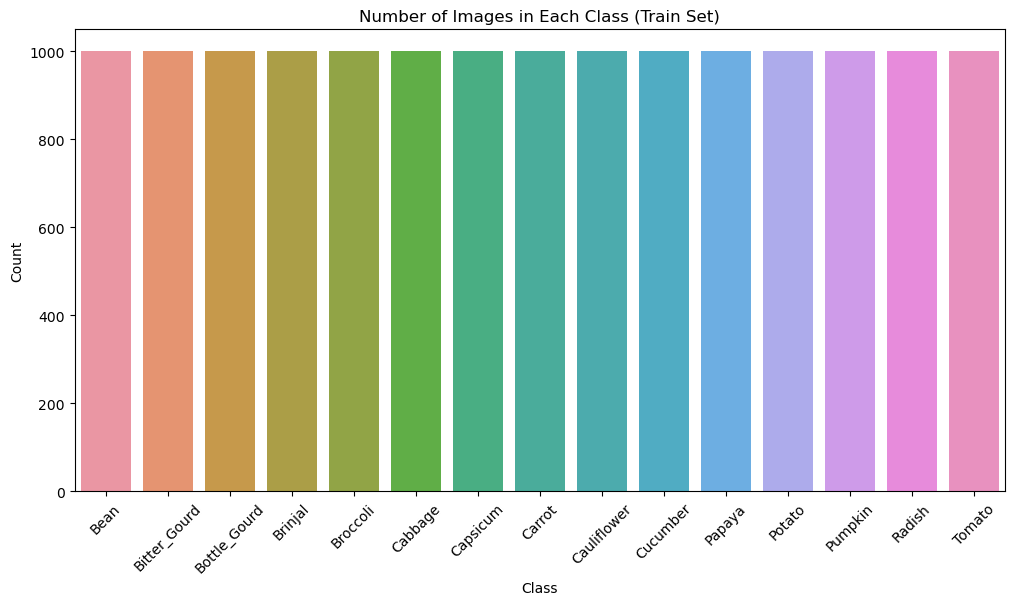

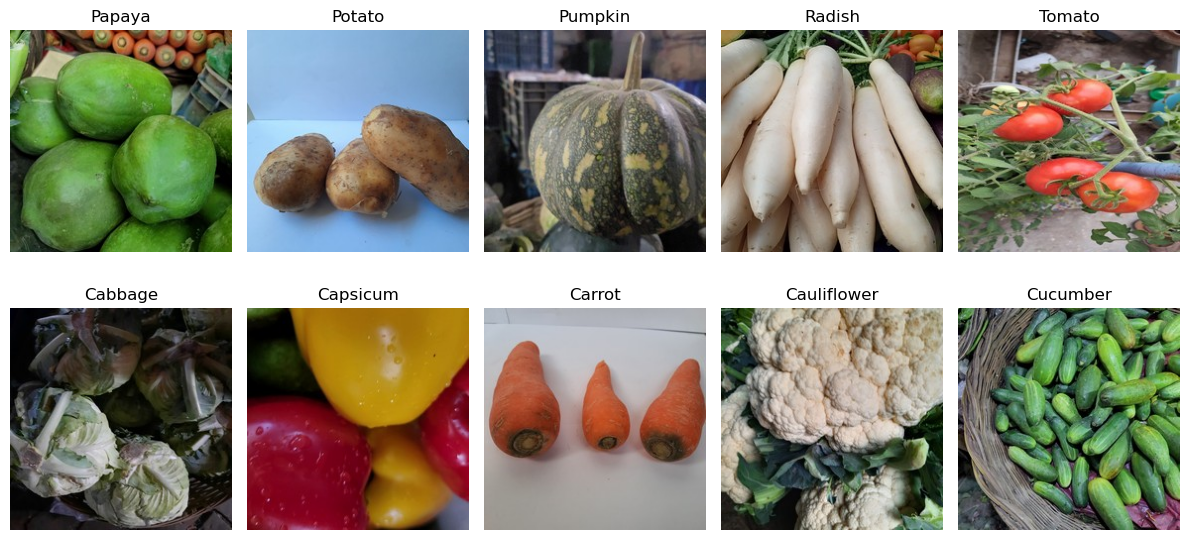

Class: Bean
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Bitter_Gourd
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Bottle_Gourd
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Brinjal
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Broccoli
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Cabbage
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Capsicum
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Carrot
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Cauliflower
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: Cucumber
Train Set: 1000 images
Validation Set: 200 images
Test Set: 200 images
-----------
Class: 

In [8]:

class_names = sorted(os.listdir(train_dir))

# Count the number of images in each class for train set, validation set, and test set
train_counts = []
valid_counts = []
test_counts = []

for class_name in class_names:
    train_path = os.path.join(train_dir, class_name)
    valid_path = os.path.join(valid_dir, class_name)
    test_path = os.path.join(test_dir, class_name)
    
    train_count = len(os.listdir(train_path))
    valid_count = len(os.listdir(valid_path))
    test_count = len(os.listdir(test_path))
    
    train_counts.append(train_count)
    valid_counts.append(valid_count)
    test_counts.append(test_count)

# Visualize the class distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=class_names, y=train_counts)
plt.title('Number of Images in Each Class (Train Set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
for i, class_name in enumerate(class_names):
    img_path = os.path.join(train_dir, class_name, os.listdir(os.path.join(train_dir, class_name))[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(2, 5, i % 10 + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print the number of images in each class for train set, validation set, and test set
for i, class_name in enumerate(class_names):
    print(f"Class: {class_name}")
    print(f"Train Set: {train_counts[i]} images")
    print(f"Validation Set: {valid_counts[i]} images")
    print(f"Test Set: {test_counts[i]} images")
    print("-----------")

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential()

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=[150, 150, 3]))
# Parameters: (3 * 3 * input_channels + 1) * 32 = 896

# MaxPooling layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
# Parameters: (3 * 3 * 32 + 1) * 64 = 18496

# MaxPooling layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layer 1
model.add(Dense(128, activation='relu'))
# Parameters: (input_size + 1) * 128 = ...

# Dropout layer
model.add(Dropout(0.25))

# Dense layer 2
model.add(Dense(128, activation='relu'))
# Parameters: (128 + 1) * 128 = ...

# Final output layer
num_classes = 15
model.add(Dense(num_classes, activation='softmax'))
# Parameters: (128 + 1) * num_classes = ...

# Print the summary of the model
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [17]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Creating Image Data Generator for train, validation and test set

# 1. Train Set
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
                                            train_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 2. Validation Set
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
                                            valid_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

# 3. Test Set
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
                                            test_dir,
                                            target_size=(150, 150),
                                            batch_size=32,
                                            class_mode='categorical')

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


In [ ]:
import time
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_image_generator, validation_data=val_image_generator, epochs=10)
end_time = time.time()

# Calculate the total training time
total_training_time = end_time - start_time
print(f"Total training time: {total_training_time} seconds")

# Evaluate the trained model on the test set
test_loss, test_accuracy = model.evaluate(test_image_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/10
469/469 [==============================] - 396s 841ms/step - loss: 1.1963 - accuracy: 0.6037 - val_loss: 0.5255 - val_accuracy: 0.8343
Epoch 2/10
469/469 [==============================] - 378s 806ms/step - loss: 0.4681 - accuracy: 0.8533 - val_loss: 0.3120 - val_accuracy: 0.9053
Epoch 3/10
469/469 [==============================] - 374s 797ms/step - loss: 0.1826 - accuracy: 0.9412 - val_loss: 0.2691 - val_accuracy: 0.9317
Epoch 5/10
469/469 [==============================] - 376s 801ms/step - loss: 0.1406 - accuracy: 0.9543 - val_loss: 0.2222 - val_accuracy: 0.9377
Epoch 6/10
469/469 [==============================] - 372s 794ms/step - loss: 0.1180 - accuracy: 0.9625 - val_loss: 0.2548 - val_accuracy: 0.9327
Epoch 7/10
469/469 [==============================] - 384s 819ms/step - loss: 0.0965 - accuracy: 0.9686 - val_loss: 0.3159 - val_accuracy: 0.9280
Epoch 8/10
469/469 [==============================] - 378s 807ms/step - loss: 0.0736 - accuracy: 0.9763 - val_loss: 0.2512 -